## Estandarización de datos con MinMax

In [131]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import OneHotEncoder, MinMaxScaler

In [132]:
df = pd.read_csv("../data/student_habits_performance_clean_atipicos.csv")
scaler = MinMaxScaler()

In [133]:
# columnas con valores numericos
df.select_dtypes(include=[np.number]).columns

Index(['age', 'study_hours_per_day', 'social_media_hours', 'netflix_hours',
       'part_time_job', 'attendance_percentage', 'sleep_hours',
       'exercise_frequency', 'mental_health_rating',
       'extracurricular_participation', 'exam_score'],
      dtype='object')

In [134]:
df

,student_id,age,gender,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,diet_quality,exercise_frequency,parental_education_level,internet_quality,mental_health_rating,extracurricular_participation,exam_score
0,S1000,23,FEMALE,0.0,1.2,1.1,0,85.0,8.0,FAIR,6,MASTER,AVERAGE,8,1,56.2
1,S1001,20,FEMALE,6.9,2.8,2.3,0,97.3,4.6,GOOD,6,HIGH_SCHOOL,AVERAGE,8,0,100.0
2,S1002,21,MALE,1.4,3.1,1.3,0,94.8,8.0,POOR,1,HIGH_SCHOOL,POOR,1,0,34.3
3,S1003,23,FEMALE,1.0,3.9,1.0,0,71.0,9.2,POOR,4,MASTER,GOOD,1,1,26.8
4,S1004,19,FEMALE,5.0,4.4,0.5,0,90.9,4.9,FAIR,3,MASTER,GOOD,1,0,66.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
935,S1995,21,FEMALE,2.6,0.5,1.6,0,77.0,7.5,FAIR,2,HIGH_SCHOOL,GOOD,6,1,76.1
936,S1996,17,FEMALE,2.9,1.0,2.4,1,86.0,6.8,POOR,1,HIGH_SCHOOL,AVERAGE,6,1,65.9
937,S1997,20,MALE,3.0,2.6,1.3,0,61.9,6.5,GOOD,5,BACHELOR,GOOD,9,1,64.4
938,S1998,24,MALE,5.4,4.1,1.1,1,100.0,7.6,FAIR,0,BACHELOR,AVERAGE,1,0,69.7


In [135]:
# escalar con minmax los valores numericos
df["age"] = scaler.fit_transform(df[["age"]])
df["study_hours_per_day"] = scaler.fit_transform(df[["study_hours_per_day"]])
df["social_media_hours"] = scaler.fit_transform(df[["social_media_hours"]])
df["netflix_hours"] = scaler.fit_transform(df[["netflix_hours"]])
df["attendance_percentage"] = scaler.fit_transform(df[["attendance_percentage"]])
df["sleep_hours"] = scaler.fit_transform(df[["sleep_hours"]])
df["exam_score"] = scaler.fit_transform(df[["exam_score"]])
df.head()

,student_id,age,gender,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,diet_quality,exercise_frequency,parental_education_level,internet_quality,mental_health_rating,extracurricular_participation,exam_score
0,S1000,0.857143,FEMALE,0.000000,0.214286,0.239130,0,0.629630,0.727273,FAIR,6,MASTER,AVERAGE,8,1,0.406504
1,S1001,0.428571,FEMALE,0.920000,0.500000,0.500000,0,0.933333,0.212121,GOOD,6,HIGH_SCHOOL,AVERAGE,8,0,1.000000
2,S1002,0.571429,MALE,0.186667,0.553571,0.282609,0,0.871605,0.727273,POOR,1,HIGH_SCHOOL,POOR,1,0,0.109756
3,S1003,0.857143,FEMALE,0.133333,0.696429,0.217391,0,0.283951,0.909091,POOR,4,MASTER,GOOD,1,1,0.008130
4,S1004,0.285714,FEMALE,0.666667,0.785714,0.108696,0,0.775309,0.257576,FAIR,3,MASTER,GOOD,1,0,0.544715


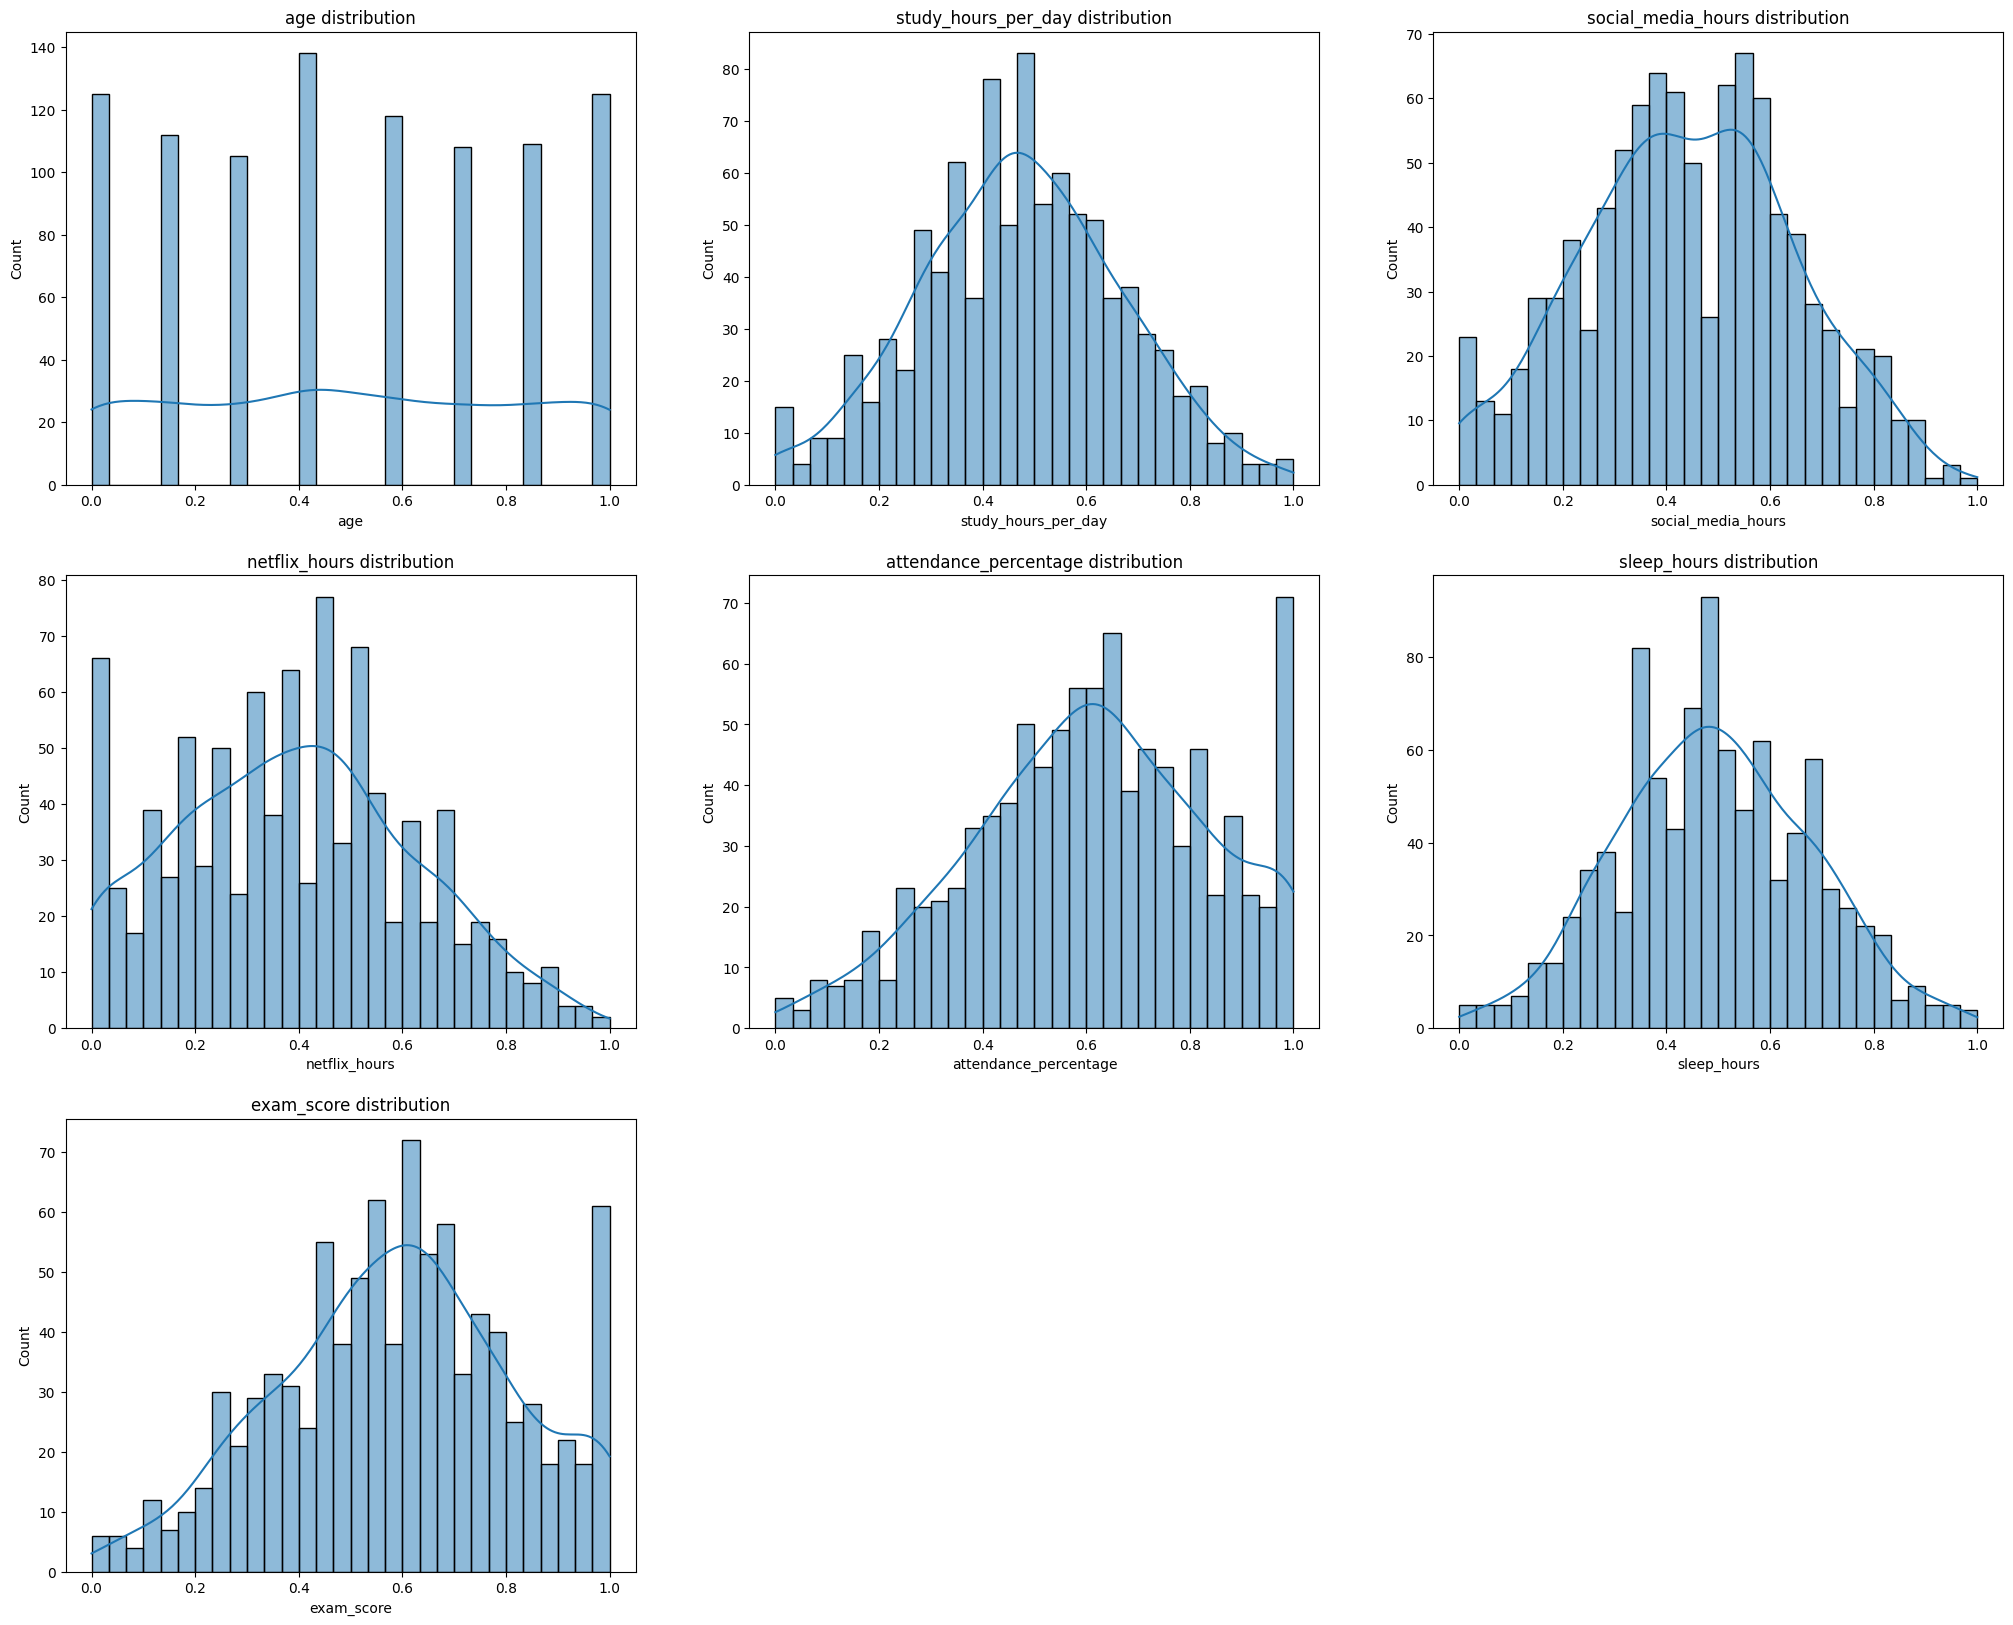

In [136]:
# graficas de distribucion

plt.figure(figsize=(25,20))

plt.subplot(3, 3, 1)
sns.histplot(df['age'].dropna(), kde=True, bins=30)
plt.title('age distribution')

plt.subplot(3, 3, 2)
sns.histplot(df['study_hours_per_day'].dropna(), kde=True, bins=30)
plt.title('study_hours_per_day distribution')

plt.subplot(3, 3, 3)
sns.histplot(df['social_media_hours'].dropna(), kde=True, bins=30)
plt.title('social_media_hours distribution')

plt.subplot(3, 3, 4)
sns.histplot(df['netflix_hours'].dropna(), kde=True, bins=30)
plt.title('netflix_hours distribution')

plt.subplot(3, 3, 5)
sns.histplot(df['attendance_percentage'].dropna(), kde=True, bins=30)
plt.title('attendance_percentage distribution')

plt.subplot(3, 3, 6)
sns.histplot(df['sleep_hours'].dropna(), kde=True, bins=30)
plt.title('sleep_hours distribution')

plt.subplot(3, 3, 7)
sns.histplot(df['exam_score'].dropna(), kde=True, bins=30)
plt.title('exam_score distribution')
plt.show()

In [137]:
df.columns

Index(['student_id', 'age', 'gender', 'study_hours_per_day',
       'social_media_hours', 'netflix_hours', 'part_time_job',
       'attendance_percentage', 'sleep_hours', 'diet_quality',
       'exercise_frequency', 'parental_education_level', 'internet_quality',
       'mental_health_rating', 'extracurricular_participation', 'exam_score'],
      dtype='object')

## variables categoricas a dummies

In [138]:
# convierto gender a 0 y 1
df["gender"] = df["gender"].map({"MALE": 1, "FEMALE": 0})
df

,student_id,age,gender,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,diet_quality,exercise_frequency,parental_education_level,internet_quality,mental_health_rating,extracurricular_participation,exam_score
0,S1000,0.857143,0,0.000000,0.214286,0.239130,0,0.629630,0.727273,FAIR,6,MASTER,AVERAGE,8,1,0.406504
1,S1001,0.428571,0,0.920000,0.500000,0.500000,0,0.933333,0.212121,GOOD,6,HIGH_SCHOOL,AVERAGE,8,0,1.000000
2,S1002,0.571429,1,0.186667,0.553571,0.282609,0,0.871605,0.727273,POOR,1,HIGH_SCHOOL,POOR,1,0,0.109756
3,S1003,0.857143,0,0.133333,0.696429,0.217391,0,0.283951,0.909091,POOR,4,MASTER,GOOD,1,1,0.008130
4,S1004,0.285714,0,0.666667,0.785714,0.108696,0,0.775309,0.257576,FAIR,3,MASTER,GOOD,1,0,0.544715
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
935,S1995,0.571429,0,0.346667,0.089286,0.347826,0,0.432099,0.651515,FAIR,2,HIGH_SCHOOL,GOOD,6,1,0.676152
936,S1996,0.000000,0,0.386667,0.178571,0.521739,1,0.654321,0.545455,POOR,1,HIGH_SCHOOL,AVERAGE,6,1,0.537940
937,S1997,0.428571,1,0.400000,0.464286,0.282609,0,0.059259,0.500000,GOOD,5,BACHELOR,GOOD,9,1,0.517615
938,S1998,1.000000,1,0.720000,0.732143,0.239130,1,1.000000,0.666667,FAIR,0,BACHELOR,AVERAGE,1,0,0.589431


In [139]:
# convierto diet_quality con un ordinal encoder
from sklearn.preprocessing import OrdinalEncoder

# defino los ordenes - exercise_frequency ya es ordinal
ordenes = [
    ['POOR', 'FAIR', 'GOOD'], # diet_quality
    ['HIGH_SCHOOL', 'BACHELOR', 'MASTER'], # parental_education_level
    ['POOR', 'AVERAGE', 'GOOD'] # internet_quality
]

cols_ordinales = ['diet_quality', 'parental_education_level', 'internet_quality']
encoder = OrdinalEncoder(categories=ordenes)
df[cols_ordinales] = encoder.fit_transform(df[cols_ordinales])
df

,student_id,age,gender,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,diet_quality,exercise_frequency,parental_education_level,internet_quality,mental_health_rating,extracurricular_participation,exam_score
0,S1000,0.857143,0,0.000000,0.214286,0.239130,0,0.629630,0.727273,1.0,6,2.0,1.0,8,1,0.406504
1,S1001,0.428571,0,0.920000,0.500000,0.500000,0,0.933333,0.212121,2.0,6,0.0,1.0,8,0,1.000000
2,S1002,0.571429,1,0.186667,0.553571,0.282609,0,0.871605,0.727273,0.0,1,0.0,0.0,1,0,0.109756
3,S1003,0.857143,0,0.133333,0.696429,0.217391,0,0.283951,0.909091,0.0,4,2.0,2.0,1,1,0.008130
4,S1004,0.285714,0,0.666667,0.785714,0.108696,0,0.775309,0.257576,1.0,3,2.0,2.0,1,0,0.544715
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
935,S1995,0.571429,0,0.346667,0.089286,0.347826,0,0.432099,0.651515,1.0,2,0.0,2.0,6,1,0.676152
936,S1996,0.000000,0,0.386667,0.178571,0.521739,1,0.654321,0.545455,0.0,1,0.0,1.0,6,1,0.537940
937,S1997,0.428571,1,0.400000,0.464286,0.282609,0,0.059259,0.500000,2.0,5,1.0,2.0,9,1,0.517615
938,S1998,1.000000,1,0.720000,0.732143,0.239130,1,1.000000,0.666667,1.0,0,1.0,1.0,1,0,0.589431


In [140]:
df.mental_health_rating.groupby(df.mental_health_rating).count()

mental_health_rating
1      99
2      86
3      98
4     103
5      94
6     100
7      84
8     100
9      80
10     96
Name: mental_health_rating, dtype: int64

In [141]:
df.mental_health_rating.groupby(df.mental_health_rating).count()
# reorganizo mental_health_rating de 0 a 9
df["mental_health_rating"] = df["mental_health_rating"].map({10:9, 9:8, 8:7, 7:6, 6:5, 5:4, 4:3, 3:2, 2:1, 1:0})
df.mental_health_rating.groupby(df.mental_health_rating).count()


mental_health_rating
0     99
1     86
2     98
3    103
4     94
5    100
6     84
7    100
8     80
9     96
Name: mental_health_rating, dtype: int64

In [142]:
df

,student_id,age,gender,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,diet_quality,exercise_frequency,parental_education_level,internet_quality,mental_health_rating,extracurricular_participation,exam_score
0,S1000,0.857143,0,0.000000,0.214286,0.239130,0,0.629630,0.727273,1.0,6,2.0,1.0,7,1,0.406504
1,S1001,0.428571,0,0.920000,0.500000,0.500000,0,0.933333,0.212121,2.0,6,0.0,1.0,7,0,1.000000
2,S1002,0.571429,1,0.186667,0.553571,0.282609,0,0.871605,0.727273,0.0,1,0.0,0.0,0,0,0.109756
3,S1003,0.857143,0,0.133333,0.696429,0.217391,0,0.283951,0.909091,0.0,4,2.0,2.0,0,1,0.008130
4,S1004,0.285714,0,0.666667,0.785714,0.108696,0,0.775309,0.257576,1.0,3,2.0,2.0,0,0,0.544715
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
935,S1995,0.571429,0,0.346667,0.089286,0.347826,0,0.432099,0.651515,1.0,2,0.0,2.0,5,1,0.676152
936,S1996,0.000000,0,0.386667,0.178571,0.521739,1,0.654321,0.545455,0.0,1,0.0,1.0,5,1,0.537940
937,S1997,0.428571,1,0.400000,0.464286,0.282609,0,0.059259,0.500000,2.0,5,1.0,2.0,8,1,0.517615
938,S1998,1.000000,1,0.720000,0.732143,0.239130,1,1.000000,0.666667,1.0,0,1.0,1.0,0,0,0.589431


In [143]:
df.to_csv("../data/processed/2.1-student_habits_performance_estandarizado.csv", index=False)